# <center><font color='#800080'>Analysis for the telecom operator Megaline</font></center>

<center><img src="megaline.jpg"> </center>

## Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [Step 1. Loading libraries and dataset](#Part_1)
    * [Dataset of Calls](#Calls)
    * [Dataset of SMS](#SMS)
    * [Dataset of GPRS](#GPRS)
    * [Dataset of Service Plans](#SP)
    * [Dataset of Users](#Users)
    * [Conclusion](#Conclusion_Part_1)
<p> </p> 
* [Step 2. Data Preparation](#Part_2)
    * [Conclusion](#Conclusion_Part_2)
<p> </p> 
* [Step 3. Exploratory data analysis](#Part_3)
    * [What is the distribution of average monthly income by service plans?](#Q1)
    * [How customers of different service plans use mobile network services.](#Q2)
    * [Conclusion](#Conclusion_Part_3)
<p> </p>     
* [Step 4. Test the hypotheses](#Part_4)
<p> </p>     
* [General Conclusion](#General_Conclusion)

## Project description <a class="anchor" id="Project_description"></a>

You work as an analyst for the telecom operator Megaline. 
The telecom company Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.<br>

**Description of the plans**

`Surf`<br>
- Monthly charge: 20usd
- 500 monthly minutes, 50 texts, and 15 GB of data
- After exceeding the package limits: <br>
1. 1 minute: 3 cents (Megaline always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute, and if one megabyte of data was used, it will be counted as one gigabyte) 
2. 1 text message: 3 cents 
3. 1 GB of data: 10usd

`Ultimate`<br>
- Monthly charge: 70usd
- 3000 monthly minutes, 1000 text messages, and 30 GB of data
- After exceeding the package limits:<br> 
1. 1 minute: 1 cent <br>
2. 1 text message: 1 cent<br> 
3. 1 GB of data: 7usd

## Part 1. Loading libraries and dataset <a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

Let's load the libraries required for data manipulation and analysis.

In [1]:
#import packages for data manipulations
import pandas as pd
import numpy as np

#library of datetime functions
from datetime import datetime, timedelta
#library of statistical functions
from scipy import stats as st
from scipy.interpolate import interp1d

#import packages for data plotting
import matplotlib.pyplot as plt
import seaborn as sns

Our first step will be to load the source files, analyze their structure and understanding of data.

In [2]:
#source of the data:
#calls
df_calls = pd.read_csv("megaline_calls.csv", parse_dates=['call_date'])
#SMS
df_messages = pd.read_csv("megaline_messages.csv")
#GPRS
df_internet = pd.read_csv("megaline_internet.csv")
#service plans
df_plans = pd.read_csv("megaline_plans.csv")
#subscribers
df_users = pd.read_csv("megaline_users1.csv")

**Dataset of Calls** <a class="anchor" id="Calls"></a>

In [3]:
#structure of the dataset
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [4]:
#the first five rows of dataset
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The calls table (data on calls) structure is:
- **id** — unique call identifier
- **user_id** — the identifier of the user making the call
- **call_date** — call date
- **duration** — call duration (in minutes)

**Dataset of SMS** <a class="anchor" id="SMS"></a>

In [5]:
#structure of the dataset
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
#the first five rows of dataset
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The messages table (data on texts) structure is:
- **id** — unique text message identifier
- **message_date** — text message date
- **user_id** — the identifier of the user sending the text

**Dataset of GPRG** <a class="anchor" id="GPRS"></a>

In [7]:
#structure of the dataset
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [8]:
#the first five rows of dataset
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The internet table (data on web sessions) structure is:
- **id** — unique session identifier
- **mb_used** — the volume of data spent during the session (in megabytes)
- **session_date** — web session date
- **user_id** — user identifier

**Dataset of Service Plans** <a class="anchor" id="SP"></a>

In [9]:
#structure of the dataset
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
#the first five rows of dataset
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plans table (data on the plans) structure is:

- **plan_name** — calling plan name
- **usd_monthly_fee** — monthly charge in US dollars
- **minutes_included** — monthly minute allowance
- **messages_included** — monthly text allowance
- **mb_per_month_included** — data volume allowance (in megabytes)
- **usd_per_minute** — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
- **usd_per_message** — price per text after exceeding the package limits
- **usd_per_gb** — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

**Dataset of Users** <a class="anchor" id="Users"></a>

In [11]:
#structure of the dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
#the first five rows of dataset
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The users table (data on users) structure is:
- **user_id** — unique user identifier
- **first_name** — user's name
- **last_name** — user's last name
- **age** — user's age (years)
- **city** — user's city of residence
- **reg_date** — subscription date (yyyy-mm-dd)
- **plan** — calling plan name
- **churn_date** — the date the user stopped using the service (if the value is missing, the calling plan was being used when this data was retrieved)

### Conclusion <a class="anchor" id="Conclusion_Part_1"></a>

For analysis, we have been provided with data from the telecom company Megaline. We have five data files. They contain information about customers, their calls, SMS, Internet connections and one file is a description of prices and terms of service (prepaid mobile plans).<br>
The sample of clients is small, there are only 500 records. The billing data in the files is for 2018.

All dataset values are defined except for the "churn_date" in the df_users dataset.<br>
All date fields represented as objects and only consist days without time. It used date format as "yyyy-mm-dd".

We got a view of data, estimated the amount of data, considered data types, now let's go deeper.

## Step 2. Data Preparation <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

At this step we will convert data to the required types, find and eliminate errors.

In [13]:
#general statistic
df_calls['duration'].describe()

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

We see some records with zero duration. Let's check them.

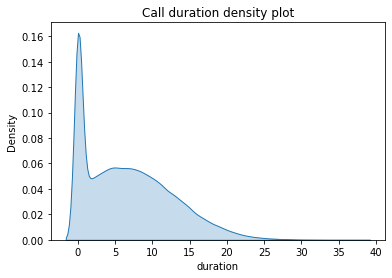

In [14]:
#Call Duration density plot
sns.kdeplot(df_calls['duration'], shade=True).set_title('Call duration density plot');

In [15]:
cnt= df_calls.query('duration==0')['duration'].count()

print('Number of calls with zero duration:', cnt)
print('Percentage of calls with zero duration {:.1%}'.format(cnt/ df_calls.shape[0]))

Number of calls with zero duration: 26834
Percentage of calls with zero duration 19.5%


The percentage of calls with a duration of 0 is quite high - about 20% of the total number of rows in the dataset.<br>
Why can such records be there?

Prepaid systems have a certain scheme of work.

<a href="https://www.tutorialspoint.com/telecom-billing/quick-billing-guide.htm">Pre-paid Scenario</a><br>
- *When customer makes a call, prepaid switching gateway captures the calling number and sends the account information to the real time billing system.*

- *Real time billing systems using the above information, authenticates the identity of the user, calculates the customer account's remaining balance using the rating tariff table and maximum allowable duration of the call, and sends this information to the prepaid gateway.*

- *The gateway establishes the call.*

- *During the call, gateway monitors the call so that the user do not exceed the maximum allowable call duration.*

- *When the call is over, the gateway sends the actual call duration to the prepaid billing system, which then calculates the actual call cost and updates the account balance, decreasing the remaining balance.*

Therefore, a lot depends on how the prepaid gateway is configured and how the billing platform is set up.
So, calls with zero duration may be normal for a Megaline system.

In addition to the configuration of the prepaid system, there is a possibility of abnormal call termination.
In telecommunication systems, it is customary to indicate the following reasons of it:<br>
*Callback, User Error, Lost Carrier, Idle Timeout, Session Timeout, Admin Reset, Port Error, NAS (network access server) Error, Service Unavailable.*<br>
We see problems with equipments and mobile network here.

In any case, the presence of such records is the reason for additional research for Megaline.

For our current task, call records are essential. In order not to lose 20% of the dataset, let's try to replace the zero duration in records and see how this affects the dataset. We use the statistical average method to determine the new values. We will choose the average value twice:
- on the first pass, we will select values by grouping users by date
- in the second pass, we take the total average value for the user

In [16]:
def fill_zero_duration(row, step):
    #the function returns the mean for the user
    try:
        if step==1: 
            #step one takes into account the date
            x= df_mean_durat.loc[((df_mean_durat['user_id']==row['user_id'])&
                                  (df_mean_durat['call_date']==row['call_date'])),'duration'].values[0]
        else: 
            #the total average value for the user
            x= df_mean_durat.loc[(df_mean_durat['user_id']==row['user_id']),'duration'].values[0]
    except:
        x= 0 #the mean value doesn't found
    return x

In [17]:
def update_calls_duration(stage):
    #the function performs the stage of update call duration
    
    #records with zero call duration
    df_zero_durat= df_calls[df_calls['duration']==0][['user_id','call_date','duration']]
    #fill zero values
    df_zero_durat['duration']= df_zero_durat.apply(fill_zero_duration, step=stage, axis=1)
    #update the main dataset 
    df_calls.update(df_zero_durat[df_zero_durat['duration']>0])
    return

#update by date
df_mean_durat = df_calls.groupby(['user_id','call_date']).agg({'duration':'mean'}).reset_index()
update_calls_duration(stage=1)
#update by user
df_mean_durat = df_calls.groupby(['user_id']).agg({'duration':'mean'}).reset_index()
update_calls_duration(stage=2)

In [18]:
#checking result
df_calls[df_calls['duration']==0]['duration'].count()

0

Let's look at the dataset after transformation.

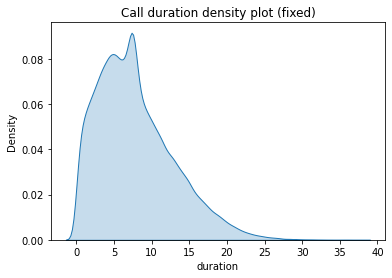

In [19]:
#density plot
sns.kdeplot(df_calls['duration'], shade=True).set_title('Call duration density plot (fixed)');

As we can see, the chosen strategy has nicely improved the data distribution.

Now let's look at the rest of datasets.

In [20]:
#convert object to date type
df_messages['message_date'] = df_messages['message_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

In [21]:
#convert object to date type
df_internet['session_date'] = df_internet['session_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

In [22]:
#general statistic
df_internet['mb_used'].describe()

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

We see some records with zero traffic here. Let's check them too.

In [23]:
print('Percentage of internet sessions with zero volume {:.1%}'
      .format(df_internet.query('mb_used==0')['mb_used'].count()/ df_internet.shape[0]))

Percentage of internet sessions with zero volume 13.1%


When a subscriber opens a mobile browser / checks mail, etc., he starts the GPRS Attach procedure - the process of authentication and authorization in the mobile network. Then the PDP Context Activation procedure takes place. A billing record for the subscriber's session is opened and the requested service starts to be provided.
The network and the phone exchange data, including the exchange of small data packets with service information indicating that the client is using the Internet.<br>
Thus, there is always PDP Context activated data traffic.

Currently, the cost of Internet traffic for a mobile operator has significantly decreased and operators have raised the threshold for entering billed data. This threshold can be a configuration of prepaid gateway and a prepaid platform.

In our task, we consider tariff plans where the price per gigabyte is indicated, and in the dataset - the amount of traffic in megabytes. We have 13% of dataset rows with zero traffic. Perhaps these are records with very low traffic volume. This could be a subject of discussion with Megaline, but for further analysis we'd better have these records  filled with more than zero values. The method of mean values showed good results with the Call Dataset, so we will use it here as well.

In [24]:
def fill_zero_volume(row, step):
    #the function returns the average value of the Internet volume for the user
    try:
        if step==1:
            #step one takes into account the date
            x= df_mean_vol.loc[((df_mean_vol['user_id']==row['user_id'])&
                                  (df_mean_vol['session_date']==row['session_date'])),'mb_used'].values[0]
        else:
            #the total average value for the user
            x= df_mean_vol.loc[(df_mean_vol['user_id']==row['user_id']),'mb_used'].values[0]
    except:
        x= 0 #the mean value doesn't found
    return x

In [25]:
def update_internet_vol(stage):
    #the function performs the stage of update Internet volume
    
    #records with zero Internet volume
    df_zero_durat= df_internet[df_internet['mb_used']==0][['user_id','session_date','mb_used']]
     #fill zero values
    df_zero_durat['mb_used']= df_zero_durat.apply(fill_zero_volume, step=stage, axis=1)
    #update the main dataset 
    df_internet.update(df_zero_durat[df_zero_durat['mb_used']>0])
    return

#update by date
df_mean_vol = df_internet.groupby(['user_id','session_date']).agg({'mb_used':'mean'}).reset_index()
update_internet_vol(stage=1)
#update by user
df_mean_vol = df_internet.groupby(['user_id']).agg({'mb_used':'mean'}).reset_index()
update_internet_vol(stage=2)

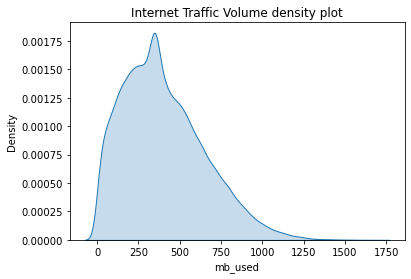

In [26]:
#Internet Traffic Volume density plot
sns.kdeplot(df_internet['mb_used'], shade=True).set_title('Internet Traffic Volume density plot');

The latest dataset is data about 500 clients.

In [27]:
#convert object to date type
df_users['reg_date'] = df_users['reg_date'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d"))

In [28]:
#check source data
df_users['reg_date'].describe(datetime_is_numeric=True)

count                              500
mean     2018-06-24 16:30:43.199999488
min                2018-01-01 00:00:00
25%                2018-03-25 18:00:00
50%                2018-06-20 00:00:00
75%                2018-09-20 06:00:00
max                2018-12-31 00:00:00
Name: reg_date, dtype: object

The dataset contains data on clients for 2018.

In [29]:
#column with undefuned values
df_users['churn_date'].describe()

count             34
unique            29
top       2018-12-18
freq               3
Name: churn_date, dtype: object

The meaning of 'churn_date' field implies undefined values, so we will leave it as it is.

### Conclusion <a class="anchor" id="Conclusion_Part_2"></a>

At this step, we looked at the contents of datasets. The data provided by Megaline has no missing values. Some underfined values in the calls dataset and in the dataset with Internet traffic require additional research. These values can be errors or normal values for processes of Megaline hardware and software. For our study, the undefined values were filled by mean values.

## Step 3.  Exploratory data analysis <a class="anchor" id="Part_3"></a>
[Go back to the Contents](#contents)

In this step, we will group the data for each client, highlight their behavior patterns and find the profit.

Important information for us:<br>
Megaline always rounds up the minute and megabyte values. If the call lasted just one second, it will be counted as one minute, and if one megabyte of data was used, it will be counted as one gigabyte.

The number of calls made and minutes used per month:

In [30]:
#round minutes up
df_calls['ceil_durat'] = np.ceil(df_calls['duration']).astype('int')

#group users by month
df_total_call = (
    df_calls
    .groupby([df_calls['user_id'], df_calls['call_date'].dt.month])
    .agg({'ceil_durat': ['sum', 'count']})
)
#replace name of columns
df_total_call.columns = ['total_duration','count_of_calls']

The number of SMS sent per month:

In [31]:
#group users by month
df_total_msg = (
    df_messages
    .groupby([df_messages['user_id'], df_messages['message_date'].dt.month])
    .agg({'id': ['count']})
)
#replace name of column
df_total_msg.columns = ['sms_counts']

The volume of data per month:

In [32]:
#group users by month
df_total_gprs = (
    df_internet
    .groupby([df_internet['user_id'], df_internet['session_date'].dt.month])
    .agg({'mb_used': ['sum']})
)
#replace name of column
df_total_gprs.columns = ['total_traffic_mb']

Now we can combine the grouped information and calculate the monthly income from each client.

In [33]:
#join calls and SMS
df_events = df_total_call.merge(df_total_msg, left_index=True, right_on=['user_id', 'message_date'], how='outer')

#join Internet traffic
df_events = df_events.merge(df_total_gprs, left_index=True, right_on=['user_id', 'session_date'], how='outer')

Missing values occurred while merging data. This happens when the client has not used some types of services during the month.

In [34]:
#replace missing values with zero
df_events.fillna(0, inplace=True)

# reset the index for further joining
df_events=df_events.reset_index()

Get rid of outliers.

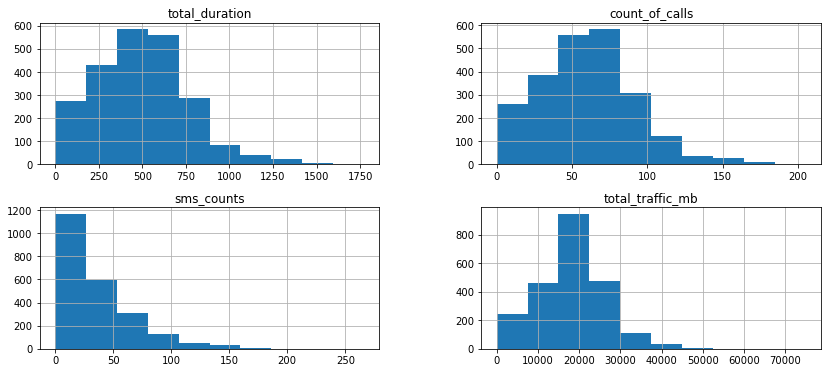

In [35]:
#distribution histograms
df_events[['total_duration','count_of_calls','sms_counts','total_traffic_mb']].hist(figsize=[14,6]);

All histograms indicate a right-skewed data sets.

In [36]:
#basic statistical details 
df_events[['total_duration','count_of_calls','sms_counts','total_traffic_mb']].describe()

,total_duration,count_of_calls,sms_counts,total_traffic_mb
count,2293.000000,2293.000000,2293.000000,2293.000000
mean,498.245094,60.067597,33.166594,18325.090732
std,272.896832,32.402563,34.070085,8392.622755
min,0.000000,0.000000,0.000000,0.000000
25%,312.000000,38.000000,3.000000,13719.923333
50%,494.000000,60.000000,26.000000,18672.163847
75%,659.000000,79.000000,51.000000,22982.956667
max,1771.000000,205.000000,266.000000,74861.412357


We see zero values in statistic, but now they mean that the client has not used the service, and this is a normal situation that does not need to be fixed.<br>
We'll use a whisker plot to define the boundaries of the dataset to approximate a normal distribution.

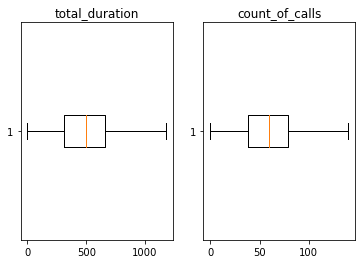

In [37]:
#whisker plot with hidden outlier points
plt.subplot(1,2,1)
plt.title('total_duration')
plt.boxplot(df_events.total_duration, vert=False, showfliers=False);

plt.subplot(1,2,2)
plt.title('count_of_calls')
plt.boxplot(df_events.count_of_calls, vert=False, showfliers=False);

A filtered dataset will consist:

- total duration less then 1300 minutes
- call counts less than 160

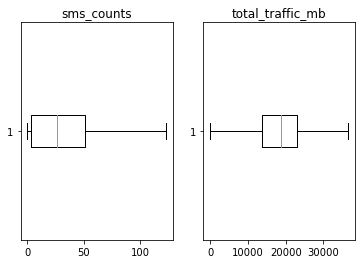

In [38]:
#whisker plot with hidden outlier points
plt.subplot(1,2,1)
plt.title('sms_counts')
plt.boxplot(df_events.sms_counts, vert=False, showfliers=False);

plt.subplot(1,2,2)
plt.title('total_traffic_mb')
plt.boxplot(df_events.total_traffic_mb, vert=False, showfliers=False);

A filtered dataset will consist:

- sms counts less then 150
- internet traffic less than 45000 MB

In [39]:
#get rid outliers from dataset
#Filtered dataset:
df_filtered = df_events.query(
    #total duration less then 1300 minutes
    "(total_duration>0 and total_duration<1300)" +
    #call counts less than 160
    " and (count_of_calls<160)" +
    #sms counts less then 150
    " and (sms_counts>0 and sms_counts<150)" +
    #total traffic mb less than 45000
    " and (total_traffic_mb>0 and total_traffic_mb<45000)"
    ).copy()

In [40]:
df = df_events.query("total_duration>0 and sms_counts>0 and total_traffic_mb>0")
print("Number of rows in the event dataset: ", df.shape[0])
print("Number of rows in the filtered dataset: ", df_filtered.shape[0])
print("Percentage of records discarded:", round(100-df_filtered.shape[0]*100/df.shape[0],2))

Number of rows in the event dataset:  1759
Number of rows in the filtered dataset:  1712
Percentage of records discarded: 2.67


The final dataset.

In [41]:
#df_users
#set index
df_users=df_users.set_index('user_id')

In [42]:
#join events and service plan
df_filtered = df_filtered.merge(df_users[['plan']], left_on=['user_id'], right_on=['user_id'])

In [43]:
#rename column by meaning
df_filtered.rename(columns={"session_date": "month"}, inplace=True)
#dataset veiw
df_filtered.head()

,user_id,month,total_duration,count_of_calls,sms_counts,total_traffic_mb,plan
0,1000.0,12,124.0,16.0,11.0,2281.764000,ultimate
1,1001.0,8,202.0,27.0,30.0,7944.646902,surf
2,1001.0,9,387.0,49.0,44.0,16434.690471,surf
3,1001.0,10,493.0,65.0,53.0,24762.122618,surf
4,1001.0,11,495.0,64.0,36.0,19284.700118,surf


Company Megaline has two service plans: "Surf" and "Ultimate".<br>
Let's calculate the monthly income for each client.

Firstly, we calculate the excess of the events limit and rate them.

In [44]:
def get_income(row, mark):
    #this function returns montly fee by tariff plan
    if (row['plan'] == 'surf'):
        i = 0
    else:
        i = 1
    if (mark == 0):   
        #monthly_fee
        return df_plans.iloc[i]['usd_monthly_pay'].astype(int)
    elif (mark == 1):
        #profit_calls_usd
        overlimit = row['total_duration'] - df_plans.iloc[i]['minutes_included']
        if overlimit > 0:        
            return round(overlimit * df_plans.iloc[i]['usd_per_minute'], 2)
    elif (mark == 2):
        #profit_sms_usd
        overlimit = row['sms_counts'] - df_plans.iloc[i]['messages_included']
        if overlimit > 0:        
            return round(overlimit * df_plans.iloc[i]['usd_per_message'], 2)
    elif (mark == 3):
        #profit_internet_usd
        overlimit = row['total_traffic_mb'] - df_plans.iloc[i]['mb_per_month_included']
        if overlimit > 0:        
            return round(np.ceil(overlimit / 1024)* df_plans.iloc[i]['usd_per_gb'], 2)
    return 0        

In [45]:
#adding a column to the main dataset  
df_filtered['monthly_fee'] = df_filtered.apply(lambda x: get_income(x , 0), axis=1)

In [46]:
#adding a column to the main dataset     
df_filtered['profit_calls_usd'] = df_filtered.apply(lambda x: get_income(x , 1), axis=1)

In [47]:
#adding a column to the main dataset     
df_filtered['profit_sms_usd'] = df_filtered.apply(lambda x: get_income(x , 2), axis=1)

In [48]:
#adding a column to the main dataset     
df_filtered['profit_internet_usd'] = df_filtered.apply(lambda x: get_income(x , 3), axis=1)

Now we know how much money we will receive from each client.

In [49]:
df_filtered.loc[0:5, 'plan':]

,plan,monthly_fee,profit_calls_usd,profit_sms_usd,profit_internet_usd
0,ultimate,70,0.0,0.00,0.0
1,surf,20,0.0,0.00,0.0
2,surf,20,0.0,0.00,20.0
3,surf,20,0.0,0.09,100.0
4,surf,20,0.0,0.00,40.0
5,surf,20,0.0,0.00,60.0


**What is the distribution of average monthly income by service plans?** <a class="anchor" id="Q1"></a>

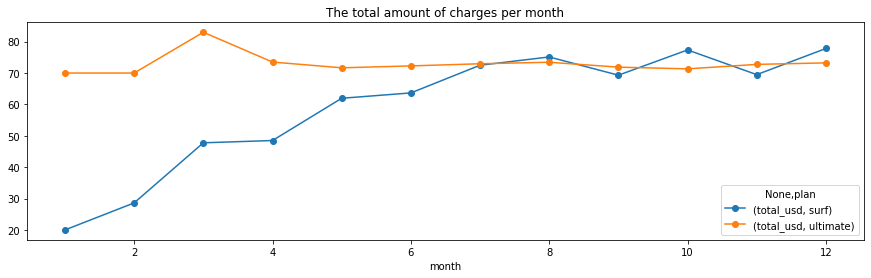

In [50]:
#total amount of charges
df_filtered['total_usd'] = (df_filtered['monthly_fee']+df_filtered['profit_calls_usd']+
                            df_filtered['profit_sms_usd']+df_filtered['profit_internet_usd'])
#plot
fig, ax = plt.subplots(figsize=(15, 4))
(
    pd.pivot_table(df_filtered, index=['month'], columns=['plan'], values=['total_usd'], aggfunc='mean')
).plot(style='o-', title='The total amount of charges per month',ax=ax);

The graph shows that income from customers using the Ultimate service plan is consistently around the monthly fee. Surf plan customers spend well above their monthly fee by service plan.

In [51]:
#basic statistical details - mean
(df_filtered.groupby('plan').mean()
 .loc[:,['profit_calls_usd','profit_sms_usd','profit_internet_usd','total_usd']]
)

,profit_calls_usd,profit_sms_usd,profit_internet_usd,total_usd
plan,,,,
surf,3.034263,0.217253,48.050260,71.301776
ultimate,0.000000,0.000000,2.659498,72.659498


As we can see, on average, the greatest income comes from using the mobile Internet in excess of the limit for the service plan.

**How customers of different service plans use mobile network services.**<a class="anchor" id="Q2"></a>

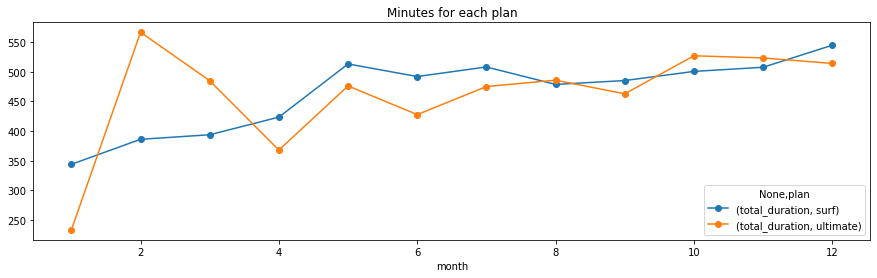

In [52]:
#minutes of each plan per month
fig, ax = plt.subplots(figsize=(15, 4))
(
    pd.pivot_table(df_filtered, index=['month'], columns=['plan'], values=['total_duration'], aggfunc='mean')
).plot(style='o-', title='Minutes for each plan', ax=ax);

Until April, the number of calls by Ultimate service plan was 1.5 times higher. After April, the number of calls differs slightly and steadily increases for both service plans.

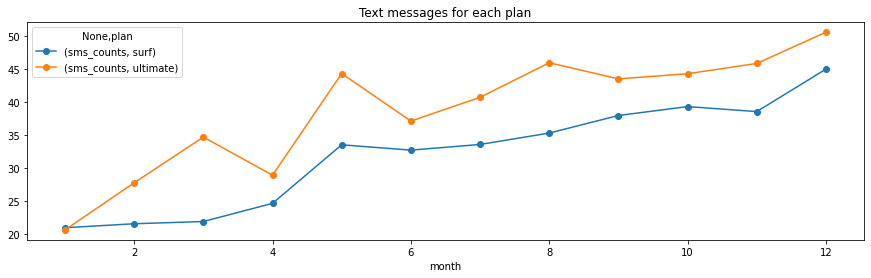

In [53]:
#text messages of each plan per month
fig, ax = plt.subplots(figsize=(15, 4))
(
    pd.pivot_table(df_filtered, index=['month'], columns=['plan'], values=['sms_counts'], aggfunc='mean')
).plot(style='o-', title='Text messages for each plan', ax=ax);

Ultimate service plan customers use text messages more often. However, on average, no more than 50 messages per month, as well as the clients with the Serf service plan.

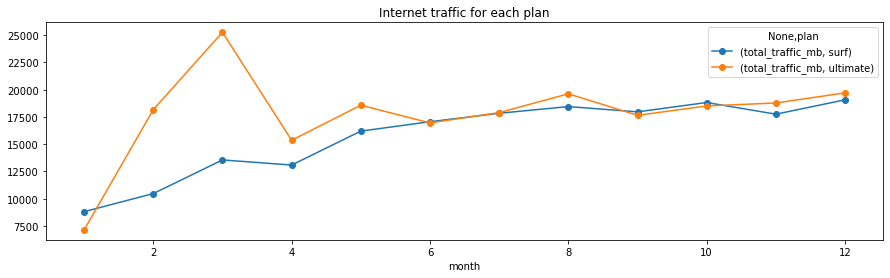

In [54]:
#volume of internet traffic of each plan per month
fig, ax = plt.subplots(figsize=(15, 4))
(
    pd.pivot_table(df_filtered, index=['month'], columns=['plan'], values=['total_traffic_mb'], aggfunc='mean')
).plot(style='o-', title='Internet traffic for each plan', ax=ax);

Until April, Ultimate service plan customers actively used mobile Internet, on average about 25 GB. Surf service plan customers followed the service plan's traffic limits first, then usage increased. Since April, customers of both plans have been sticking to around 20 GB per month.

Let's see the correlation between parameters.

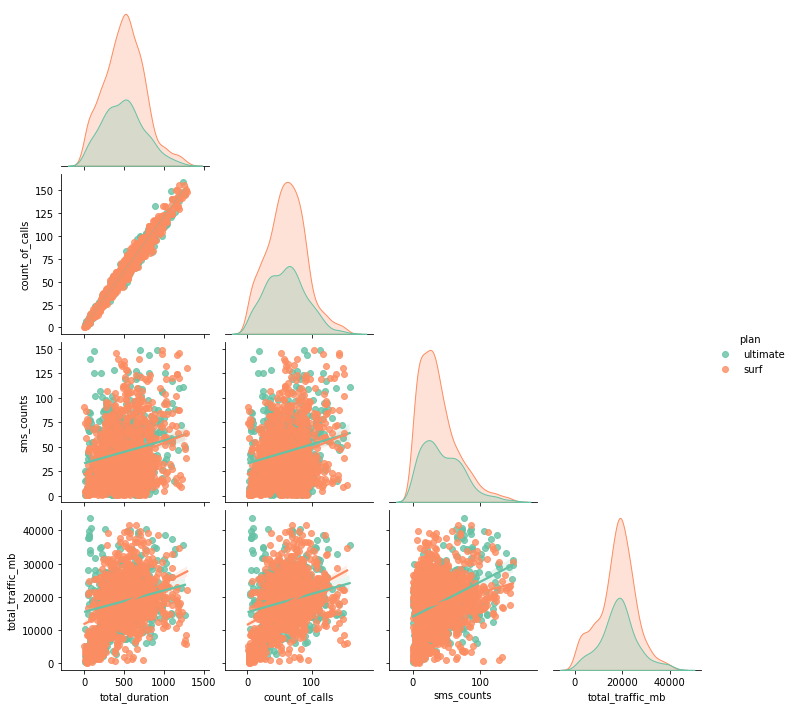

In [55]:
sns.pairplot(df_filtered.loc[:,['plan','total_duration','count_of_calls','sms_counts','total_traffic_mb'] ]
             , kind="reg", hue="plan", corner=True, palette="Set2", height=2.5);

The matrix shows a strong correlation between the duration of calls and their counts. The rest of the parameters have a weak but positive correlation with others.

To summarize, we will use the main statistical parameters - mean and standard deviation.

In [56]:
#basic statistical details - mean
(df_filtered.groupby('plan').mean()
 .loc[:,['total_duration','count_of_calls','sms_counts','total_traffic_mb']]
)

,total_duration,count_of_calls,sms_counts,total_traffic_mb
plan,,,,
surf,503.107452,60.645581,37.902946,17939.290872
ultimate,492.935484,59.682796,44.388889,18601.794087


In [57]:
#basic statistical details - standard deviation
(df_filtered.groupby('plan').std()
 .loc[:,['total_duration','count_of_calls','sms_counts','total_traffic_mb']]
)

,total_duration,count_of_calls,sms_counts,total_traffic_mb
plan,,,,
surf,251.964821,29.921030,28.992823,7769.338840
ultimate,258.577783,30.828967,30.679633,7820.684598


### Conclusion <a class="anchor" id="Conclusion_Part_3"></a>
User behavior.<br>
On average, there is no difference in the use of mobile provider services by customers of different service plans. Customers of both plans have an average of 507 minutes of conversation per month, making 57 calls, sending 37 text messages and using 18676 megabytes (18.2 gigabytes).<br>
Also, we can expect about 68% of values to be within plus-or-minus 1 standard deviation.

Monthly income.<br> 
As we have seen, the highest income comes from using the mobile Internet in excess of the service plan limit. Income from customers using the Ultimate service plan is consistently around the monthly fee.<br>
Regardless of the service plan, the average customer revenue averages $74.

## Step 4. Test the hypotheses <a class="anchor" id="Part_4"></a>
[Go back to the Contents](#contents)

Let's check our results.

*Hypothesis test 1*<br>
The null hypothesis H₀ is always stated with an equal sign, so:<br> 
H₀  - Average income from clients of service plan Ultimate and Surf equal

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁  - Average income from clients of service plan Ultimate and Surf differ

The significant level = 0.05

In order to test a hypothesis that the means of the two statistical populations are equal based on samples taken from them, we will apply a scipy.stats.ttest_ind method.
This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 

In [58]:
def ttest(sample_1, sample_2):
    alpha = .05 #The significant level

    results = st.ttest_ind(
            sample_1, 
            sample_2)

    #if the p-value is less than alpha, we reject the hypothesis
    print('p-value: ', results.pvalue)
 
    if (results.pvalue < alpha):
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis")


In [59]:
#monthly income of the service plan Serf
list_1 = df_filtered.loc[(df_filtered['plan']=='surf')]['total_usd'].tolist()
#monthly income of the service plan Ultimate
list_2 = df_filtered.loc[(df_filtered['plan']=='ultimate')]['total_usd'].tolist()
ttest( list_1, list_2)

p-value:  0.5498933965674158
We can't reject the null hypothesis


The p-value shows 54% probability of a null hypothesis.<br>
Our conclusions in the first part of the book are consistent with the result.<br>
Mean by service plan Serf - 71.3<br>
Mean by service plan Ultimate - 72.6<br>


*Hypothesis test 2*<br>
The null hypothesis H₀ is always stated with an equal sign, so:<br> 
H₀  - The average profit from users in NY-NJ area is equal from that of the users from other regions.

The alternative hypothesis, H₁, is based on H₀, so:<br>
H₁  - The average profit from users in NY-NJ area is different from that of the users from other regions.

The significant level = 0.05

We will apply a scipy.stats.ttest_ind method here as well

In [60]:
#The average profit from users in NY-NJ area
#NY-NJ area
df = df_users[(df_users.city.str.contains("NY|NJ"))]

#monthly income of the NY-NJ area
list_1 = df_filtered[df_filtered.user_id.isin(df.index)]['total_usd'].tolist()
#monthly income of others
list_2 = df_filtered[~df_filtered.user_id.isin(df.index)]['total_usd'].tolist()
ttest(list_1, list_2)

p-value:  0.9506057586335929
We can't reject the null hypothesis


The p-value tells us that there is a 95% probability that the average profit from users in NY-NJ area is equal from that of the users from other regions.

## General conclusion.<a class="anchor" id="General_Conclusion"></a>

[Go back to the Contents](#contents)

This book presents an analysis of the data of the mobile operator Megaline.<br>
Data is provided on 500 customers who made calls, sent text messages and used mobile Internet. Megaline has two service plans, Serf and Ultimate.<br>
This analysis shows patterns of customer behavior. And also the difference in charges for both service plans.

The quality of the data provided is high and required minimal changes. We interpolated call duration values and traffic volume to remove anomalies and keep the sample size.

Then, we normalized data and found that the sample consists of entities with calls total duration less than 1300 minutes, call counts less than 160, sms counts less than 150, and Internet traffic volume less than 45,000MB.

In the filtered dataset, we added the tariffication of events according to the tariffs of the service plans. Then we  calculated the monthly profit by clients and compared the company's monthly revenue by service plan. We also identified patterns of customer behavior in the Megaline network.

In turn, we tested two hypotheses:
- The average profit from users of Ultimate and Surf calling plans differs.
- The average profit from users in NY-NJ area is different from that of the users from other regions.

We rejected both of them.